## Load data

In [13]:
import pandas as pd

log_file = "/tmp/test/head_model/history.json"
log_file = "/Users/DToma/work/classification_model/laboratory/model/head_model/history.json"
df = pd.read_json(log_file)
df

,train_loss,test_loss,test_accuracy,learning_rate
0,2.140891,2.218486,0.588336,0.001
1,1.527102,1.930808,0.629545,0.001
2,1.298503,1.768689,0.650364,0.001
3,1.143346,1.660586,0.662056,0.001
4,1.026289,1.583139,0.671752,0.001
5,0.933811,1.542720,0.683588,0.001
6,0.857926,1.510847,0.687152,0.001
7,0.791707,1.510259,0.699130,0.001
8,0.734820,1.528892,0.698275,0.001
9,0.689000,1.540155,0.705404,0.001


## Loss

<Axes: >

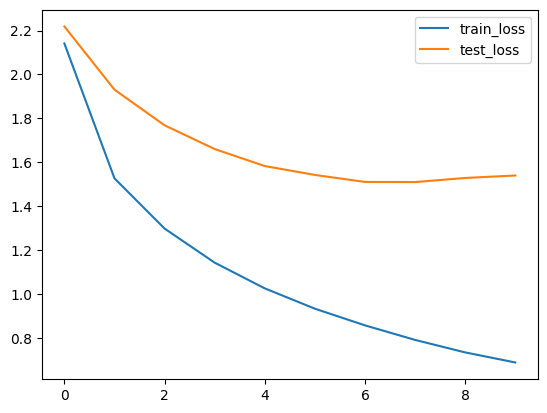

In [14]:
# plot the loss
df[['train_loss','test_loss']].plot()

## Accuracy

<Axes: >

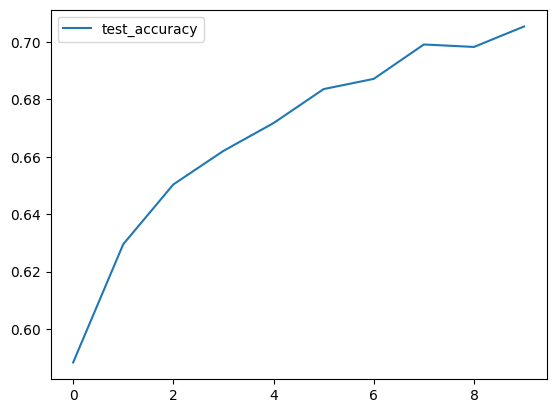

In [15]:
# plot accuracy
df[['test_accuracy']].plot()

## Learning rate

<Axes: >

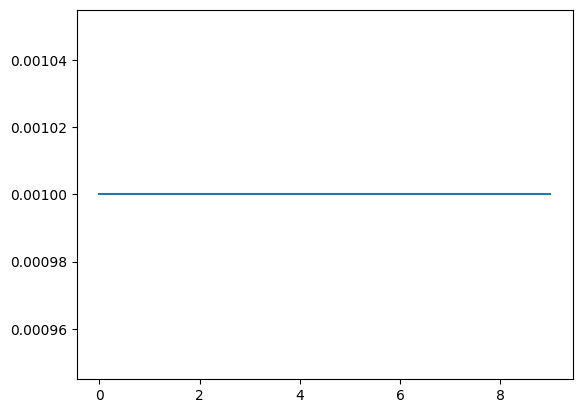

In [3]:
df['learning_rate'].plot()